In [9]:
# napari需要的环境

In [2]:
# #PyQt5-sip==4.19.19 PyQt5-tools==5.12.1.1.5rc4 
# !pip install  PyQt5==5.12.3 PyQtWebEngine==5.12.1
# !pip install jedi==0.17.2
# !pip install ipython==7.23.1
# !pip install napari
# spyder 5.2.2 requires pyqt5<5.13, which is not installed.
# spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
# spyder 5.2.2 requires ipython<8.0.0,>=7.6.0, but you have ipython 8.14.0 which is incompatible.
# spyder 5.2.2 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.0 which is incompatible.

In [2]:
import squidpy as sq
import anndata as ad
import napari
import scanpy as sc

import numpy as np
import pandas as pd
#sc.logging.print_header()
print(f"squidpy=={sq.__version__}")
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib as mpl
import cv2
#%config InlineBackend.figure_format = 'retina'

squidpy==1.2.2


In [4]:
#画图自定义从了colormap   #Spectral :"#9E0142" "#D53E4F" "#F46D43" "#FDAE61" "#FEE08B" "#FFFFBF" "#E6F598" "#ABDDA4" "#66C2A5" "#3288BD" "#5E4FA2"

In [5]:
#设置字体
from matplotlib.pyplot import rc_context
sc.set_figure_params( color_map = 'viridis_r',figsize=(5,5))

# Generate ST data using Napari in an interactive manner

## initialization

In [3]:
#generate grid location   Spider的enhance中生成网格点函数
from Spider.enhance import gen_lowpixel_grid
'''
Num_sample-spot数
grid_row,grid_row-坐标size
windows_row,windows_col-网格窗口size

'''
lr_spatial_idx, lr_spatial, grid_row_num, grid_col_num = gen_lowpixel_grid(
     original_grid=None,
    Num_sample=2500,
    grid_row=5000,
    grid_col=5000,
    windows_row=25,
    windows_col=25)

In [4]:
#load img data 读取图片数据

Image.MAX_IMAGE_PIXELS=None
im = Image.open("E:/quyang/Spider/figures/fig3_scatterplot_muti_square_500000.png")
image = np.array(im)
# #or create blank img data 或者创建空白图片
# img = np.full((4544, 5184, 3), 255, dtype = np.uint8)
# img = sq.im.ImageContainer(img, library_id='Simulated data')

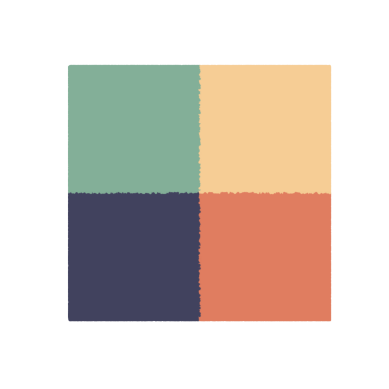

In [5]:
#show img  显示图片
#img = cv2.imread("E:/quyang/Spider/figures/fig3_scatterplot_muti_square_500000.png")
img = mpl.image.imread("E:/quyang/Spider/figures/fig3_scatterplot_muti_square_500000.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
#initialize cluster information 初始化adata数据
adata = ad.AnnData(np.zeros((lr_spatial.shape[0] ,1)))
adata.obs["cluster_init"] = "Undefined"
adata.uns={"spatial":{'Simulated data':{'scalefactors':{"spot_diameter_fullres": 89.44395653112628*0.2, "tissue_hires_scalef": 0.17011142, "fiducial_diameter_fullres": 144.48639131951168, "tissue_lowres_scalef": 0.051033426}}}}
adata.obsm["spatial"] = lr_spatial
#创建ImageContainer对象 
img = sq.im.ImageContainer(img, library_id='Simulated data')
img

ImageContainer[shape=(800, 800), layers=['image']]

## use napari-squidpy

### 报错
ImportError: cannot import name 'QT_API_PYQT6' from 'IPython.external.qt_loaders' (C:\Users\ubuntu\anaconda3\lib\site-packages\IPython\external\qt_loaders.py)

解决：在!pip install ipython==7.23.1和!pip install napari之后重新更新!pip install ipython==8.14.0

In [23]:
#start create label info  
'''
双击cluster_init 可视化 自定义/规则的点阵
点击new shape layer 依次框选目标区域（白、黄、粉、天蓝框）可视化目标layer shift+E 保存 new layer
关闭窗口，layer信息储存在viewer.adata.obs，其中Ture表示点阵中该层位置
'''
viewer = img.interactive(adata)

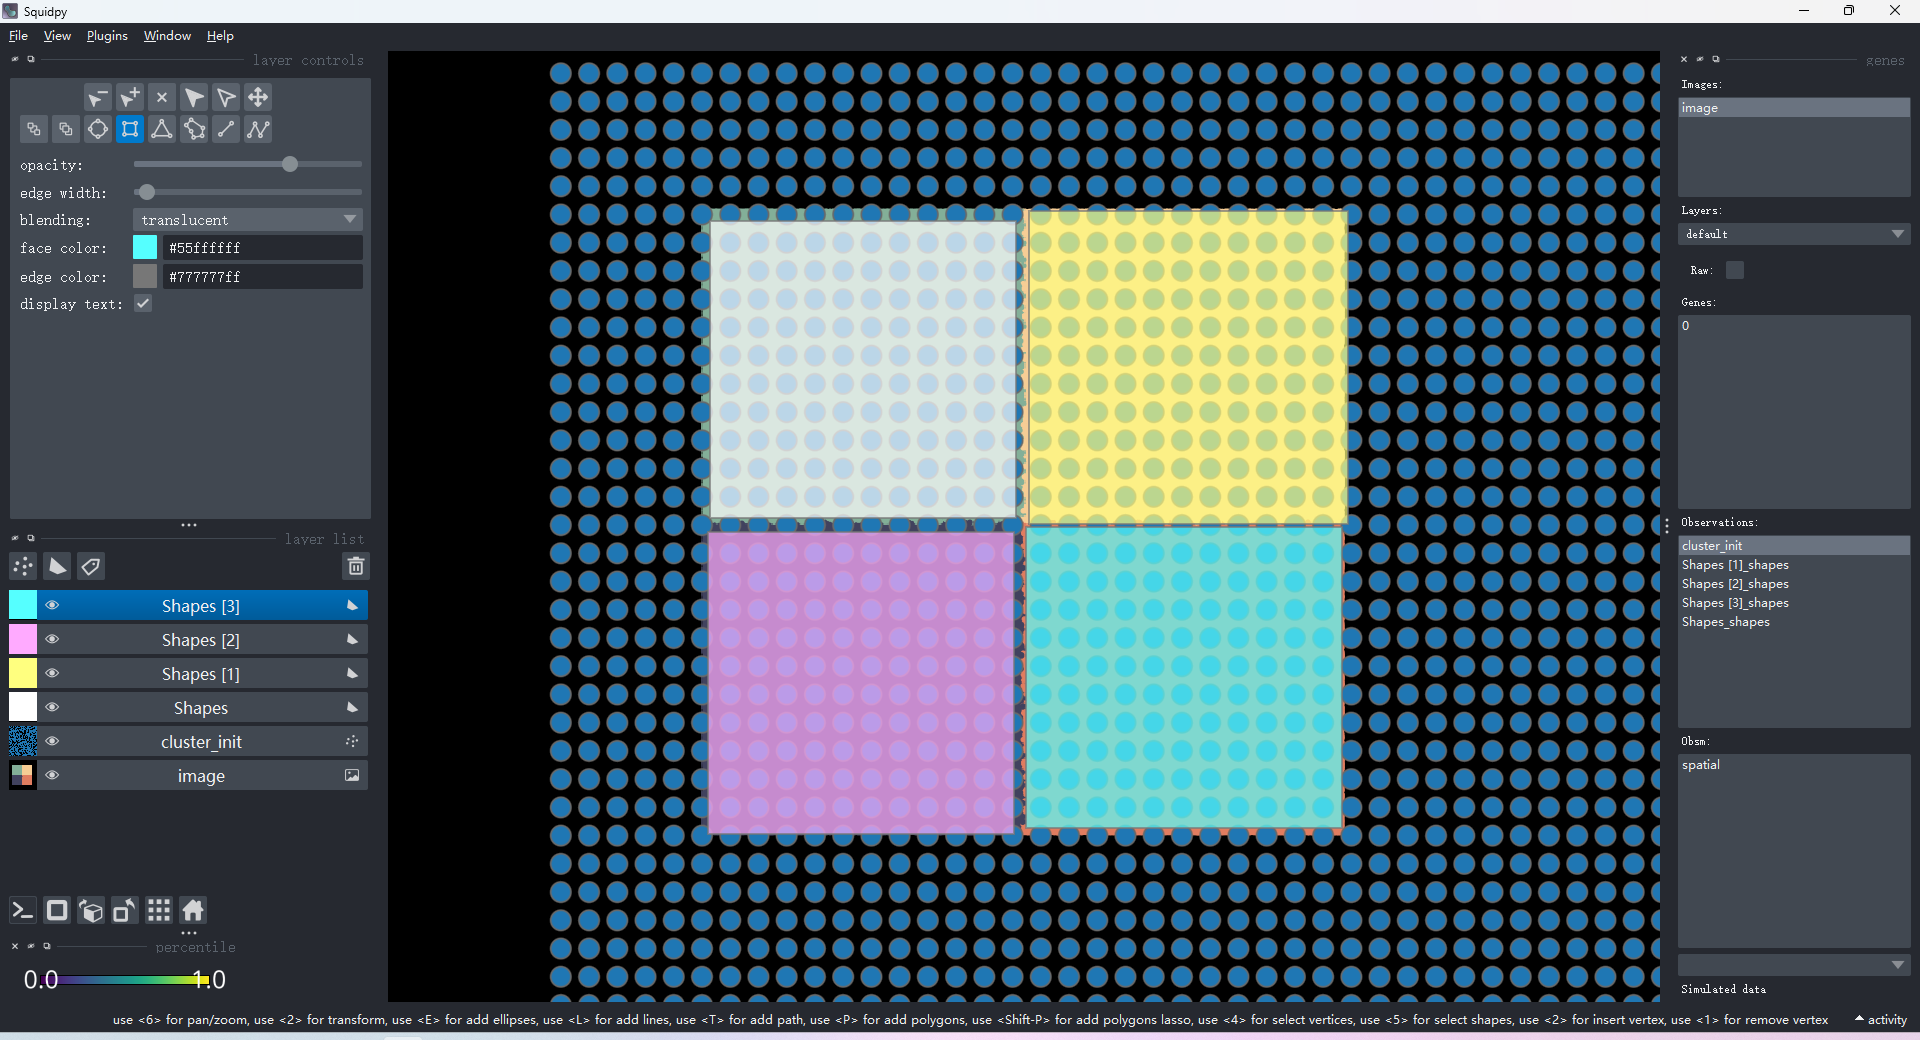

In [52]:
# viewer.adata.obs

## save result

In [49]:
newadata = viewer.adata.copy()
#newadata.obs.head(2) #showing it must be named from the outside in order
#rename the layer specificly 层的重命名
simu_label_res = np.zeros(newadata.obs.shape[0]) #define Undefined label = 0
for i in np.arange(1,newadata.obs.shape[1]):
    #newadata.obs.cluster_init[np.where(newadata.obs.iloc[:,1]==True)[0]] = ["Layer" +str(i)]*sum(newadata.obs.iloc[:,i]==True)
    simu_label_res[np.where(newadata.obs.iloc[:,i]==True)[0]] = i
simu_label_res = pd.DataFrame(simu_label_res,columns=["simulated_label"],dtype=int).astype('category')
newadata.obs = simu_label_res
newadata.uns = {'spatial':newadata.uns['spatial']}
newadata.uns['cluster_init_colors'] = ["#9E0142","#D53E4F","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#ABDDA4"][0:5]
# print(newadata.obs.simulated_label)    

In [54]:
newadata.uns = {'spatial':newadata.uns['spatial']}
newadata.uns['cluster_init_colors'] = ["#9E0142","#D53E4F","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#ABDDA4"]

## plot scatter

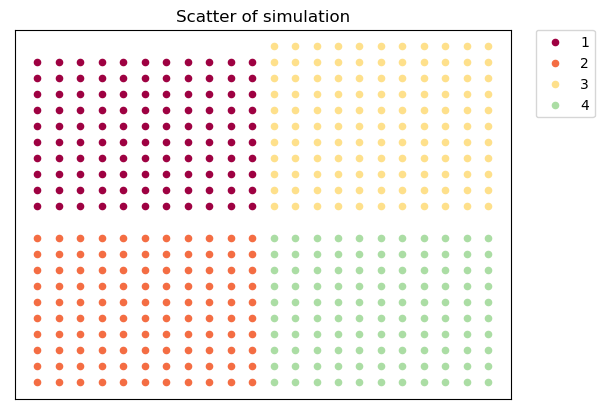

In [64]:
# save simu file
# newadata.obs.to_csv('./simu_label.csv')
# newadata.write_h5ad("./simu.h5ad")
# newadata = sc.read('./simu.h5ad')
# plot scatter 画图
plt.figure(dpi=100)
colors = ["#9E0142","#F46D43","#FEE08B","#ABDDA4","#66C2A5","#3288BD","#5E4FA2"]
for i in np.arange(1,newadata.obs['simulated_label'].unique().shape[0]):
    clust_index = np.where(newadata.obs['simulated_label']==newadata.obs['simulated_label'].unique()[i])
    plt.scatter(x=newadata.obsm['spatial'][clust_index,0], 
                y=newadata.obsm['spatial'][clust_index,1], 
                c=colors[i-1],
                s=20, #spot size
                label = newadata.obs['simulated_label'].unique()[i])
plt.title('Scatter of simulation')
#plt.legend(loc=0)
plt.legend(newadata.obs['simulated_label'].cat.categories[1:],loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.grid(visible=False)
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
plt.show()
#plt.axis('off')
#plt.savefig("./figures/scatter_simulation.pdf",dpi=100,bbox_inches='tight')

# DLPFC data gen (using real location info)

In [77]:
samples = ["151507", "151508", "151509", "151510", "151669", "151670",
           "151671", "151672", "151673", "151674", "151675", "151676"]
BestK=[7,7,7,7,5,5,5,5,7,7,7,7]
path = "E:/quyang/HumanPilot-master/10X/"
path_GT = "E:/quyang/HumanPilot-master/outputs/SpatialDE_clustering/cluster_labels_"
sample_id = 8 #151673
#PCA_components = 50
adata = sc.read_visium(path+samples[sample_id]+"/")
spatial = adata.uns['spatial']   #save image info
loc = adata.obsm['spatial'] #use real location info

#from PIL import Image
source_image_path=path+samples[sample_id]+"/"+samples[sample_id]+"_full_image.tif"
Image.MAX_IMAGE_PIXELS=None
im = Image.open(source_image_path) #use real img
image = np.array(im)
#img = sq.im.ImageContainer(image, library_id=samples[sample_id])
img = sq.im.ImageContainer(image, library_id='Simulated data')
img
# #or create blank img
# image_width = 13332   #y
# image_height = 13332   #x
# img = np.full((image_width, image_height, 3), 255, dtype = np.uint8)
# img = sq.im.ImageContainer(img, library_id='Simulated data')
# img
#initialize cluster information
adata = ad.AnnData(np.zeros((loc.shape[0] ,1)))
adata.obs["cluster_init"] = "Undefined"
adata.uns={"spatial":{'Simulated data':{'scalefactors':{"spot_diameter_fullres": 89.44395653112628, "tissue_hires_scalef": 0.17011142, "fiducial_diameter_fullres": 144.48639131951168, "tissue_lowres_scalef": 0.051033426}}}}
adata.obsm["spatial"] = loc

C:\Users\ubuntu\anaconda3\lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [78]:
viewer = img.interactive(adata)

In [105]:
newadata = viewer.adata.copy()
#rename the layer specificly for 151673
# newadata.obs.cluster_init = ['Layer1']*newadata.obs.shape[0]
# for i in np.arange(1,newadata.obs.shape[1]):
#     newadata.obs.cluster_init[newadata.obs.iloc[:,i]==True] = ["Layer" +str(i)]*sum(newadata.obs.iloc[:,i]==True)
#     #specificly for 151673
#     if i==7:
#         newadata.obs.cluster_init[newadata.obs.iloc[:,i]==True] = ["WM"]*sum(newadata.obs.iloc[:,i]==True)
simu_label_res = np.repeat('Layer1',newadata.obs.shape[0]) 
for i in np.arange(1,newadata.obs.shape[1]):
    #specificly for 151673
    simu_label_res[np.where(newadata.obs.iloc[:,i]==True)[0]] = "Layer" +str(i)
    if i==7:
        simu_label_res[np.where(newadata.obs.iloc[:,i]==True)[0]] = "WM"
simu_label_res = pd.DataFrame(simu_label_res,columns=["cluster_init"]).astype('category')
newadata.obs = simu_label_res
# newadata.obs = newadata.obs['cluster_init'].to_frame() 
newadata.uns["spatial"] = spatial
newadata.uns['cluster_init_colors'] = ["#9E0142","#D53E4F","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#ABDDA4"]
#newadata.write_h5ad(path+"simu_151673.h5ad")

## scanpy画图报错
AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

解决：在scanpy库文件夹找到出问题的文件./scanpy/plotting/_tools/scatterplots.py并打开

在scatterplots.py中导入matplotlib库（前面找一行输入import matplotlib）

找到第163行（添加第二步中的语句前为162行）如下

将163行函数改为matplotlib.cm.get_cmap并保存

即cmap = copy(colormaps.get_cmap(cmap)) 改成cmap = copy(matplotlibcm.get_cmap(cmap))

重新启动jupyter lab后就可以正常运行
（https://blog.csdn.net/weixin_60734652/article/details/133394826）

In [93]:
newadata.uns['cluster_init_colors'] = ["#9E0142","#D53E4F","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#ABDDA4"]
#sc.pl.spatial(newadata, color='cluster_init',save="151673_simu_sq.pdf",title='Simulation',img_key=None,size=2) #,palette='Spectral'
sc.pl.spatial(newadata, color='cluster_init',title='Simulation',img_key=None,size=2) #,palette='Spectral'

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

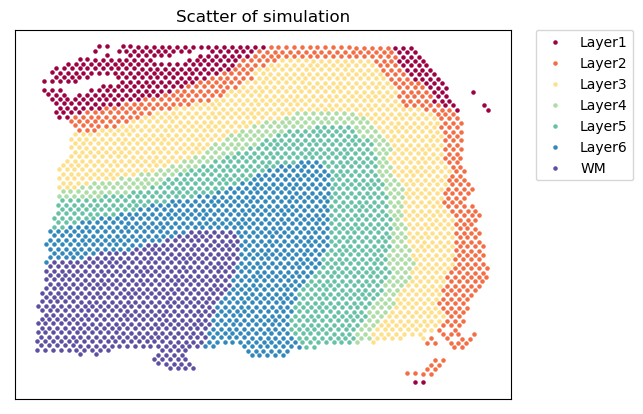

In [131]:
plt.figure(dpi=100)
colors = ["#9E0142","#F46D43","#FEE08B","#ABDDA4","#66C2A5","#3288BD","#5E4FA2"]
for i in np.arange(0,newadata.obs['cluster_init'].unique().shape[0]):
    clust_index = np.where(newadata.obs['cluster_init']==np.unique(newadata.obs['cluster_init'])[i])
    plt.scatter(x=newadata.obsm['spatial'][clust_index,0], 
                y=newadata.obsm['spatial'][clust_index,1], 
                c=colors[i],
                s=5, #spot size
                label = np.unique(newadata.obs['cluster_init'])[i])
plt.title('Scatter of simulation')
#plt.legend(loc=0)
plt.legend(newadata.obs['cluster_init'].cat.categories, loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.grid(visible=False)
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
plt.show()

In [132]:
# newadata.uns = adata.uns
# sc.pl.spatial(newadata1, color='cluster_init',title="Simulation") #,save="151673_simu_sq.pdf"

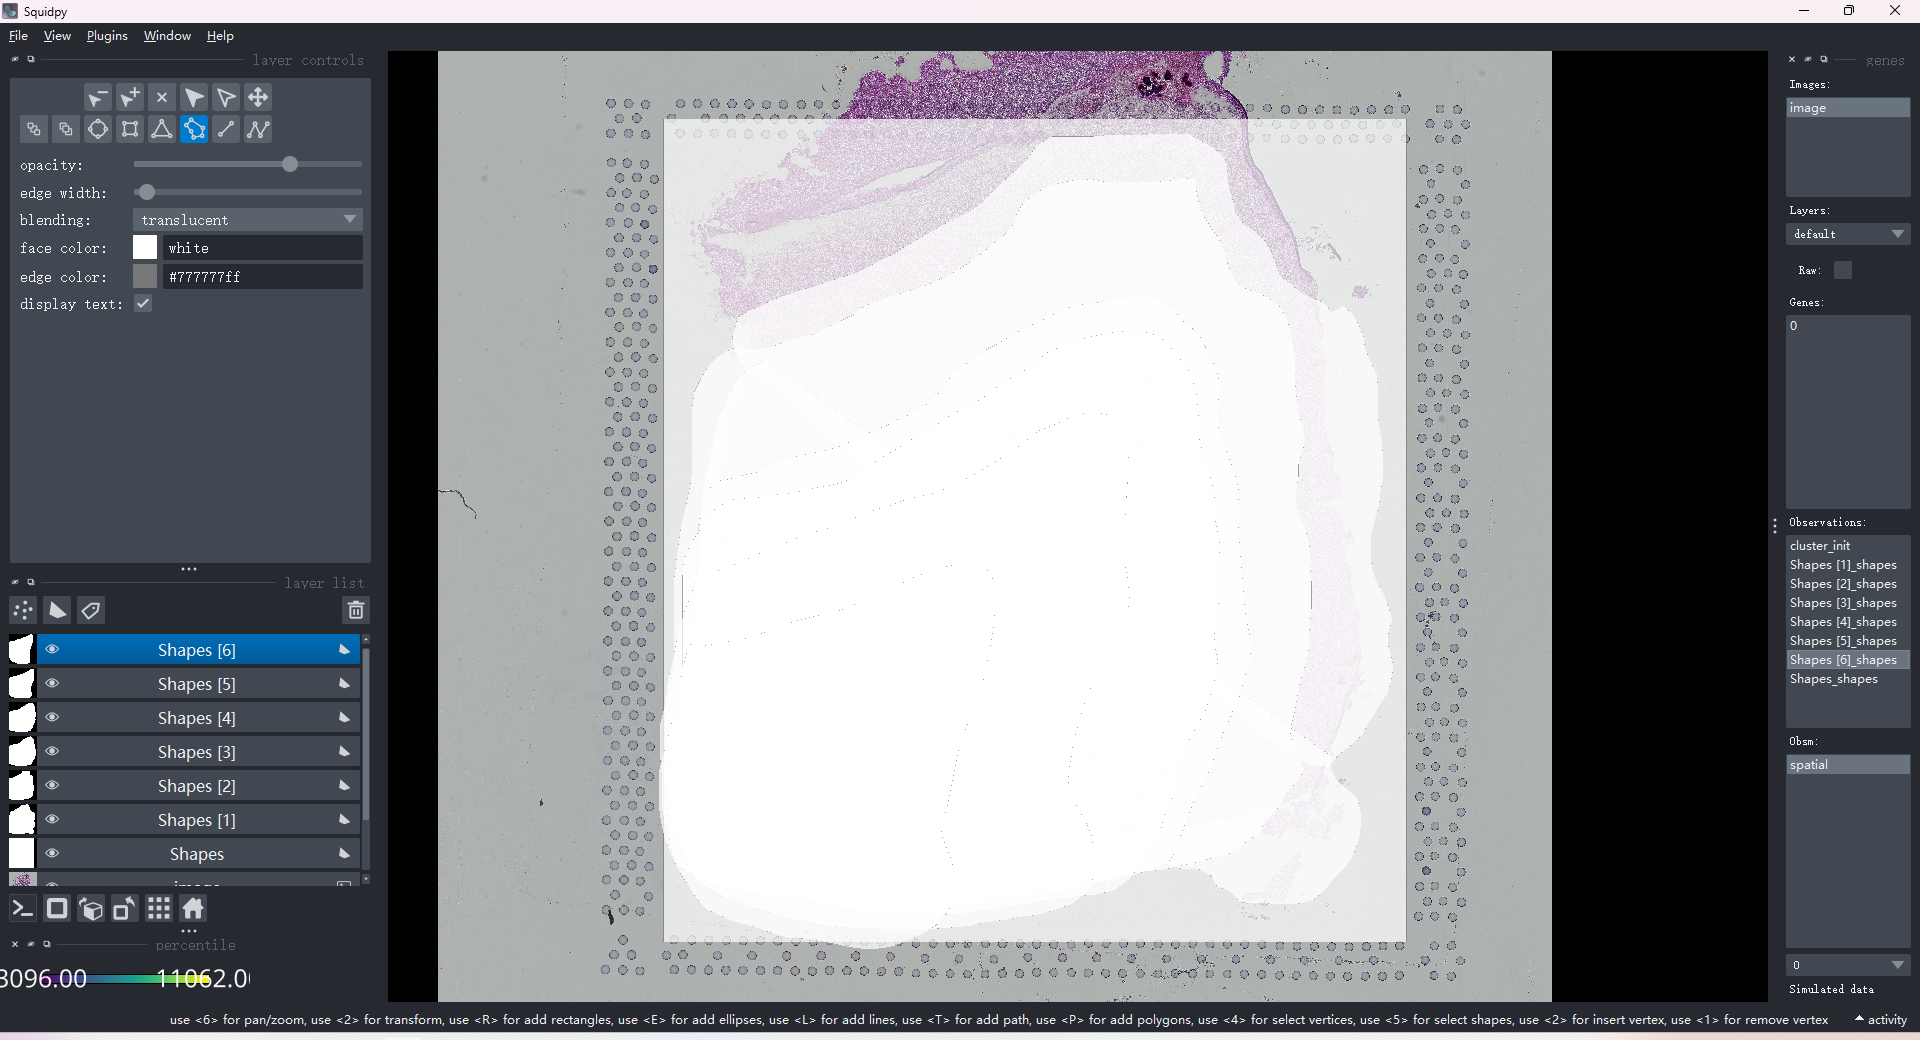

# olfactory bulb data gen (using real location info)

In [133]:
path = "E:/quyang/olfactory bulb/"
adata = sc.read_h5ad(path+"MOB_sample_data .h5ad")
loc = adata.obs[['array_row', 'array_col']]
loc = np.array(loc)

#initialize cluster information
adata = ad.AnnData(np.zeros((lr_spatial.shape[0] ,1)))
adata.obs["cluster_init"] = "Undefined"
adata.uns={"spatial":{'Simulated data':{'scalefactors':{"spot_diameter_fullres": 89.44395653112628*0.2, "tissue_hires_scalef": 0.17011142, "fiducial_diameter_fullres": 144.48639131951168, "tissue_lowres_scalef": 0.051033426}}}}
adata.obsm["spatial"] = lr_spatial
# load img
img = cv2.imread("E:/quyang/Spider/100048576_57.jpg")
#img = np.full((image_width, image_height, 3), 255, dtype = np.uint8)
img = sq.im.ImageContainer(img, library_id='Simulated data')
img

ImageContainer[shape=(4544, 5184), layers=['image']]

In [134]:
viewer = img.interactive(adata)

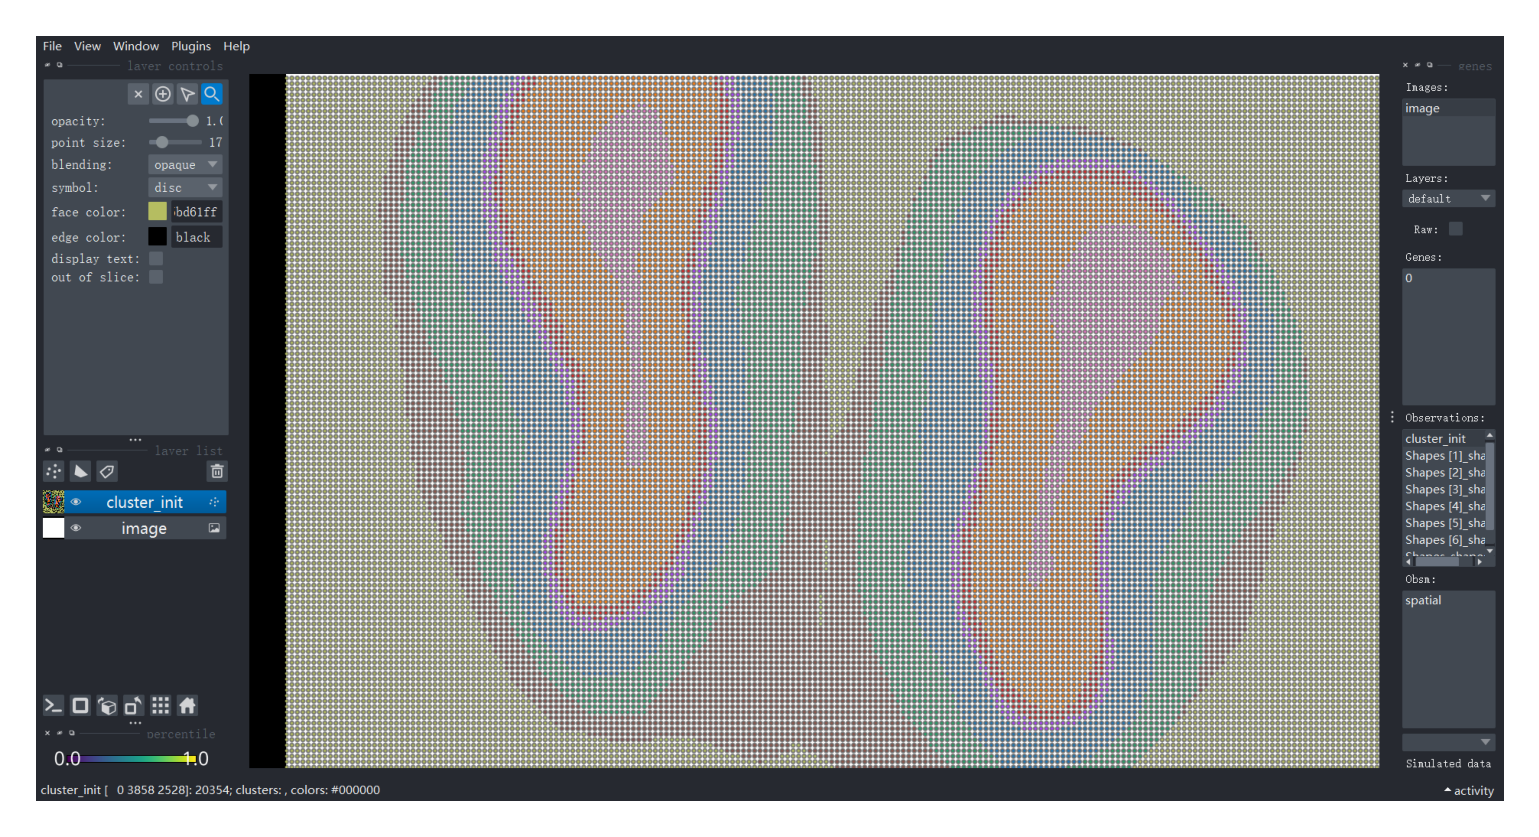

In [135]:
# newadata = viewer.adata.copy()
# ##rename 
# newadata.obs.cluster_init='0'
# layername = np.array(['ONL','GL','EPL','MCL','IPL','GCL','RMS'])
# for i in np.arange(1,newadata.obs.shape[1]):
#     newadata.obs['cluster_init'][newadata.obs.iloc[:,i]==True] = np.repeat(layername[i-1],sum(newadata.obs.iloc[:,i]==True))
# newadata.obs = pd.DataFrame(newadata.obs['cluster_init'])  
# newadata.uns = {'spatial':newadata.uns['spatial']}
# newadata.uns['cluster_init_colors'] = ["#9E0142","#D53E4F","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#ABDDA4"]

# ##plot
# plt.figure(dpi=100)
# colors = ["#9E0142","#F46D43","#FEE08B","#ABDDA4","#66C2A5","#3288BD","#5E4FA2"]
# for i in np.arange(1,newadata.obs['cluster_init'].unique().shape[0]):
#     clust_index = np.where(newadata.obs['cluster_init']==newadata.obs['cluster_init'].unique()[i])
#     plt.scatter(x=newadata.obsm['spatial'][clust_index,0], 
#                 y=newadata.obsm['spatial'][clust_index,1], 
#                 c=colors[i-1],
#                 s=2,
#                 label = newadata.obs['cluster_init'].unique()[i])
# plt.title('Olfactory bulb simulation')

# plt.legend(['ONL','GL','EPL','MCL','IPL','GCL','RMS'],loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# plt.grid(visible=False)
# plt.xticks([])
# plt.yticks([])
# plt.gca().invert_yaxis()
# ##plt.axis('off')
# ##plt.savefig("./figures/Olfactory bulb simulation2.pdf",dpi=100,bbox_inches='tight')

# End